In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud
    
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
data = pd.read_csv('events_clean.csv')

Рассмотрим данные о событиях в России. Данные взяты с сайта https://timepad.ru/ с 29 мая до конца 2024 года.

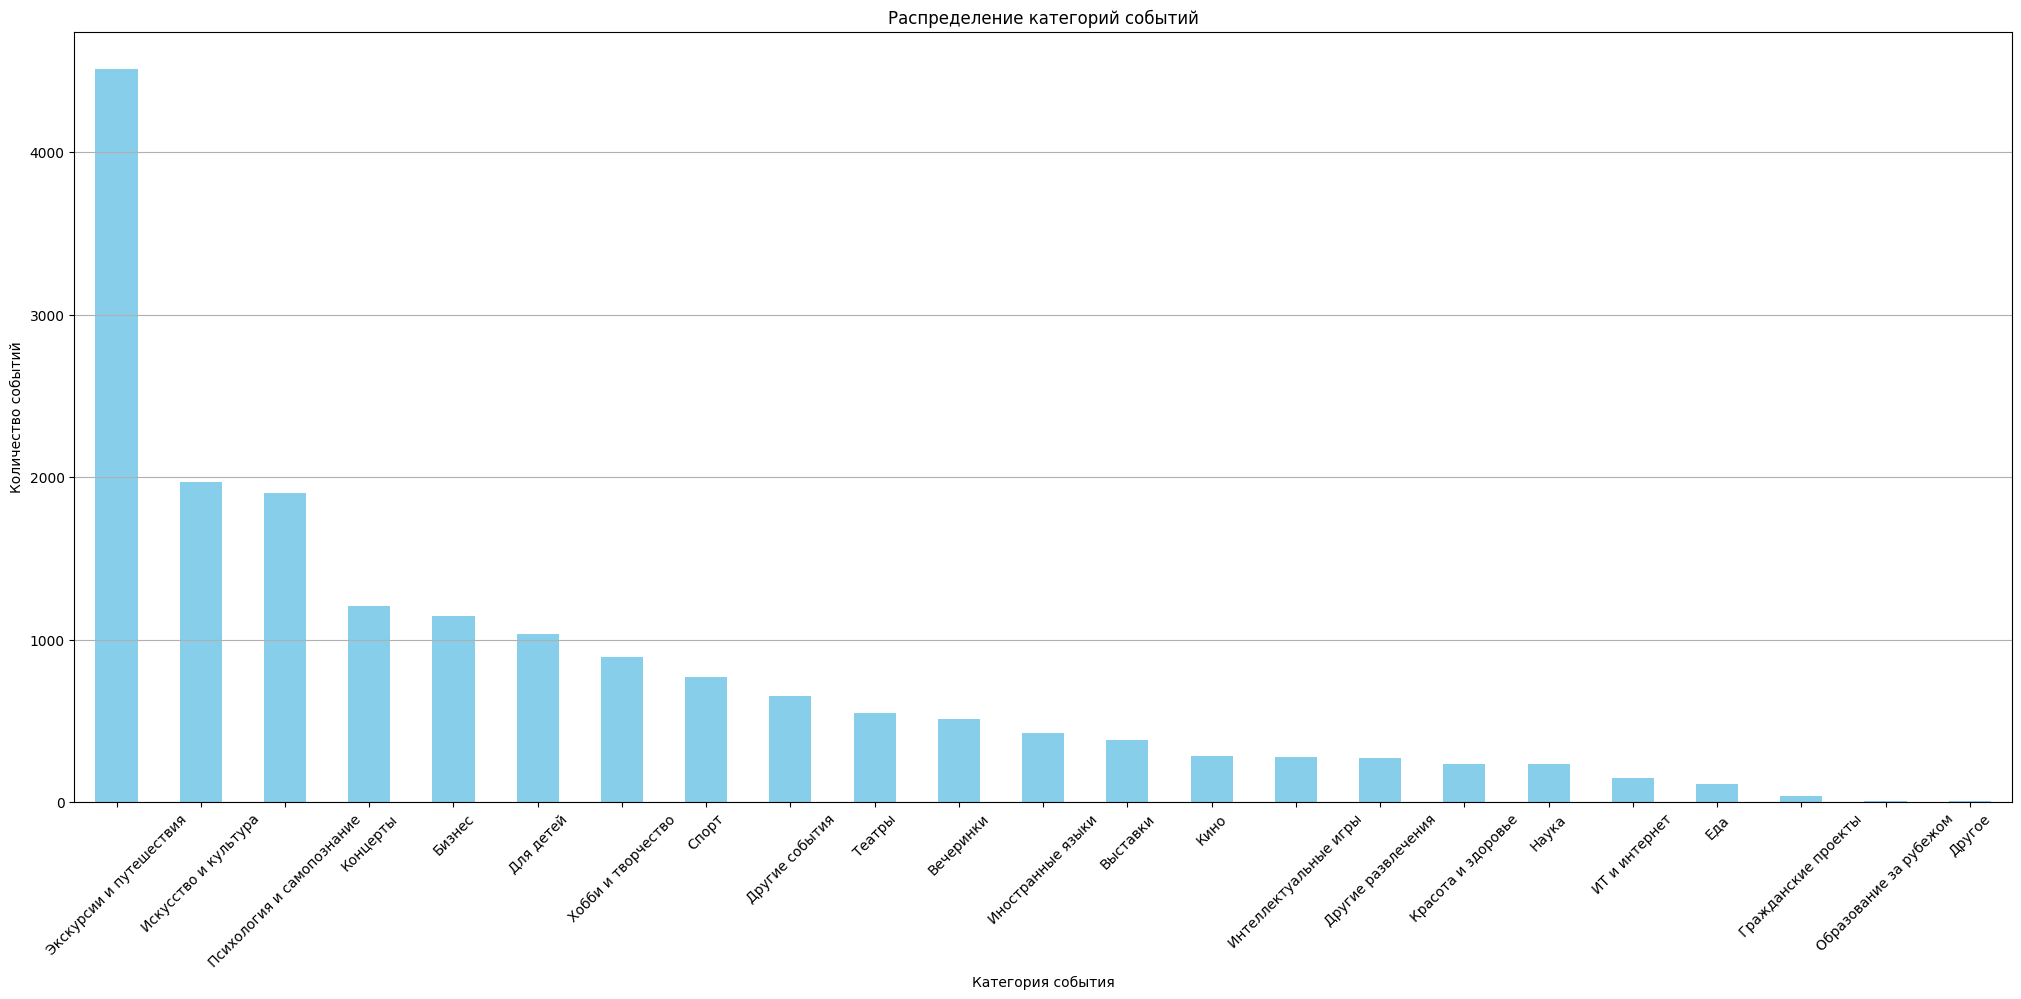

In [3]:
# Изучим распределение категорий событий
plt.figure(figsize=(25, 10))
data['Категория события'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Распределение категорий событий')
plt.xlabel('Категория события')
plt.ylabel('Количество событий')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

В публичных выступлениях наше основное внимание уделяется категории "Бизнес" (конференции и тренинги). Однако на данный момент эту категорию опережает категория "Психология и самопознание". Психология и различные выступления в этой области сейчас пользуются большой популярностью.

Возможно, стоит рассмотреть возможность интеграции интерактивных презентаций, специально посвященных психологии. Например, мы могли бы собирать данные в реальном времени о состоянии аудитории (например, уровень депрессии) и использовать эти данные для адаптации содержания выступлений. Это лишь предварительные размышления

### Рассмотрим соотношение онлайн-событий и оффлайн по категорим:

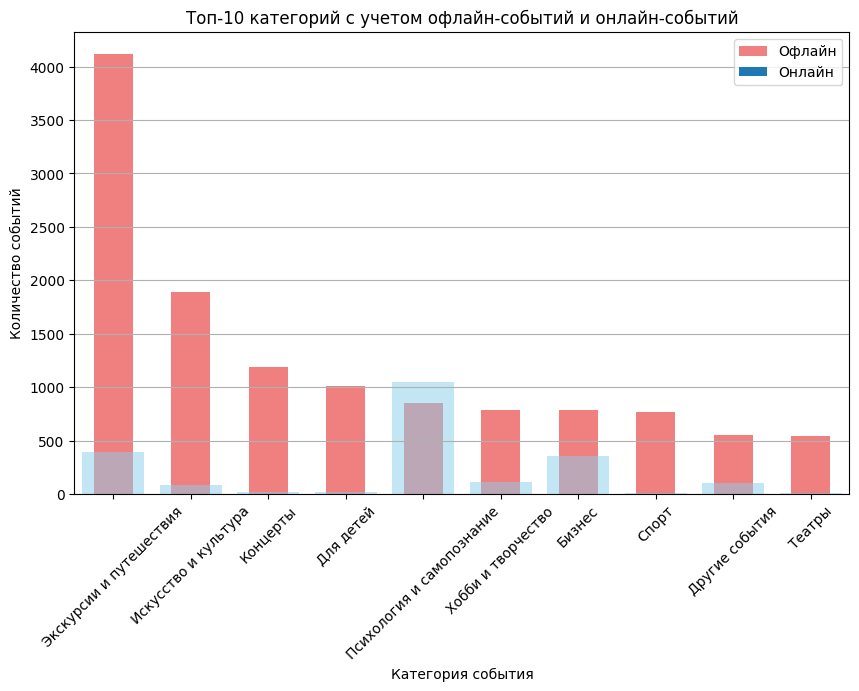

In [5]:
# Фильтруем данные, чтобы оставить только события, проводимые офлайн
offline_events = data[~data['Город'].str.contains('Онлайн', case=False)]

# Топ-5 категорий среди офлайн-событий
top_categories_offline = offline_events['Категория события'].value_counts().nlargest(10)

# Создаем график
plt.figure(figsize=(10, 6))

# Рисуем столбцы для офлайн-событий
top_categories_offline.plot(kind='bar', color='lightcoral', label='Офлайн')

# Добавляем столбцы для онлайн-событий с прозрачностью
for category in top_categories_offline.index:
    online_count = len(data[(data['Категория события'] == category) & (data['Город'].str.contains('Онлайн', case=False))])
    plt.bar(category, online_count, color='skyblue', alpha=0.5)

# Добавляем пустой столбец для легенды
plt.bar([], [], color='skyblue', label='Онлайн')

plt.title('Топ-10 категорий с учетом офлайн-событий и онлайн-событий')
plt.xlabel('Категория события')
plt.ylabel('Количество событий')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')
plt.show()

В сфере психологии большинство тренингов проводится онлайн. В то же время количество офлайн событий по психологии практически сопоставимо с количеством событий в сфере бизнеса. Примечательно, что около половины событий в бизнесе также проводятся онлайн.

### Рассмотрим категорию психология и основные слова в названиях и описаниях данных мероприятий, которые проводятся оффлайн

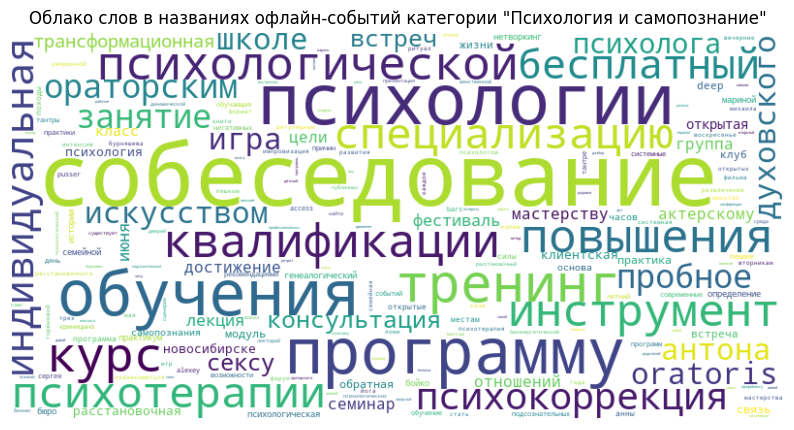

In [6]:
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Получаем названия офлайн-событий из категории "Бизнес"
offline_business_events = data[(data['Категория события'] == 'Психология и самопознание') & (~data['Город'].str.contains('Онлайн', case=False))]['Название'].dropna()

# Создаем строку, содержащую все названия офлайн-событий
all_titles_offline = ' '.join(offline_business_events)

# Определяем список стоп-слов для русского языка
stop_words = set(stopwords.words('russian'))
stop_words.add('это')

# Очищаем текст от лишних символов и приводим к нижнему регистру
cleaned_text_offline = ' '.join([word.lower() for word in all_titles_offline.split() if word.isalpha() and word.lower() not in stop_words])

# Считаем частоту встречаемости слов
word_freq_offline = Counter(cleaned_text_offline.split())

# Создаем облако слов
wordcloud_offline = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_offline)

# Отображаем облако слов
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_offline, interpolation='bilinear')
plt.title('Облако слов в названиях офлайн-событий категории "Психология и самопознание"')
plt.axis('off')
plt.show()

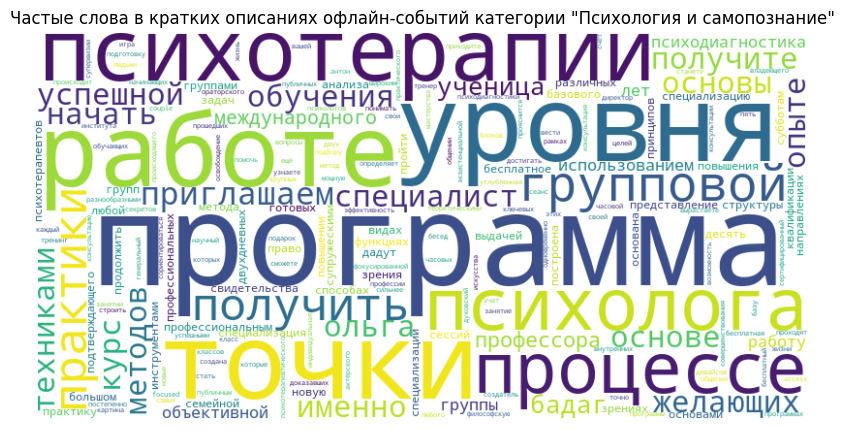

In [8]:
# Получаем описания офлайн-событий из категории "Психология и самопознание"
offline_psychology_events = data[(data['Категория события'] == 'Психология и самопознание') & (~data['Город'].str.contains('Онлайн', case=False))]['Краткое описание'].dropna()

# Создаем строку, содержащую все описания офлайн-событий
all_descriptions_offline = ' '.join(offline_psychology_events)

# Определяем список стоп-слов для русского языка
stop_words = set(stopwords.words('russian'))
stop_words.add('это')

# Очищаем текст от лишних символов и приводим к нижнему регистру
cleaned_text_offline = ' '.join([word.lower() for word in all_descriptions_offline.split() if word.isalpha() and word.lower() not in stop_words])

# Считаем частоту встречаемости слов
word_freq_offline = Counter(cleaned_text_offline.split())

# Создаем облако слов
wordcloud_offline = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_offline)

# Отображаем облако слов
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_offline, interpolation='bilinear')
plt.title('Частые слова в кратких описаниях офлайн-событий категории "Психология и самопознание"')
plt.axis('off')
plt.show()

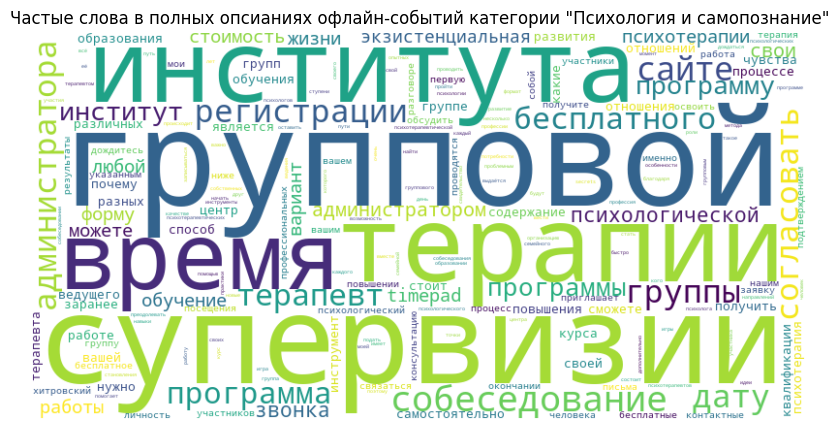

In [9]:
# Получаем описания офлайн-событий из категории "Психология и самопознание"
offline_psychology_events = data[(data['Категория события'] == 'Психология и самопознание') & (~data['Город'].str.contains('Онлайн', case=False))]['Полное описание'].dropna()

# Создаем строку, содержащую все описания офлайн-событий
all_descriptions_offline = ' '.join(offline_psychology_events)

# Определяем список стоп-слов для русского языка
stop_words = set(stopwords.words('russian'))
stop_words.update(['это','которые','которые'])

# Очищаем текст от лишних символов и приводим к нижнему регистру
cleaned_text_offline = ' '.join([word.lower() for word in all_descriptions_offline.split() if word.isalpha() and word.lower() not in stop_words])

# Считаем частоту встречаемости слов
word_freq_offline = Counter(cleaned_text_offline.split())

# Создаем облако слов
wordcloud_offline = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_offline)

# Отображаем облако слов
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_offline, interpolation='bilinear')
plt.title('Частые слова в полных опсианиях офлайн-событий категории "Психология и самопознание"')
plt.axis('off')
plt.show()

### Рассмотрим частые слова в категории бизнес в названиях и описаниях этой категории

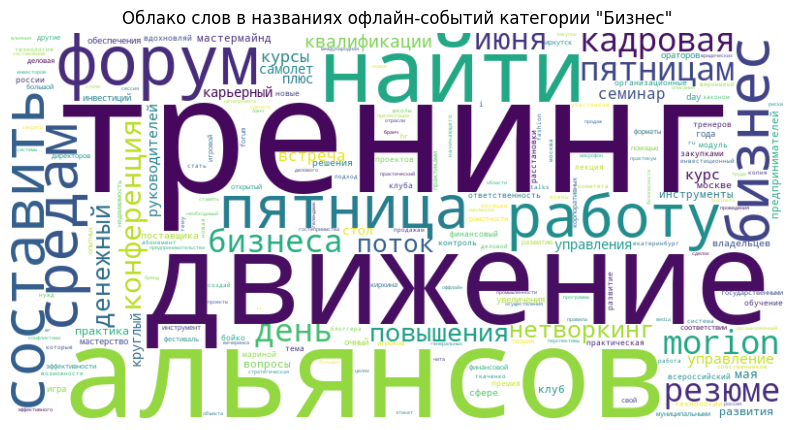

In [10]:
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Получаем названия офлайн-событий из категории "Бизнес"
offline_business_events = data[(data['Категория события'] == 'Бизнес') & (~data['Город'].str.contains('Онлайн', case=False))]['Название'].dropna()

# Создаем строку, содержащую все названия офлайн-событий
all_titles_offline = ' '.join(offline_business_events)

# Определяем список стоп-слов для русского языка
stop_words = set(stopwords.words('russian'))
stop_words.add('это')

# Очищаем текст от лишних символов и приводим к нижнему регистру
cleaned_text_offline = ' '.join([word.lower() for word in all_titles_offline.split() if word.isalpha() and word.lower() not in stop_words])

# Считаем частоту встречаемости слов
word_freq_offline = Counter(cleaned_text_offline.split())

# Создаем облако слов
wordcloud_offline = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_offline)

# Отображаем облако слов
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_offline, interpolation='bilinear')
plt.title('Облако слов в названиях офлайн-событий категории "Бизнес"')
plt.axis('off')
plt.show()

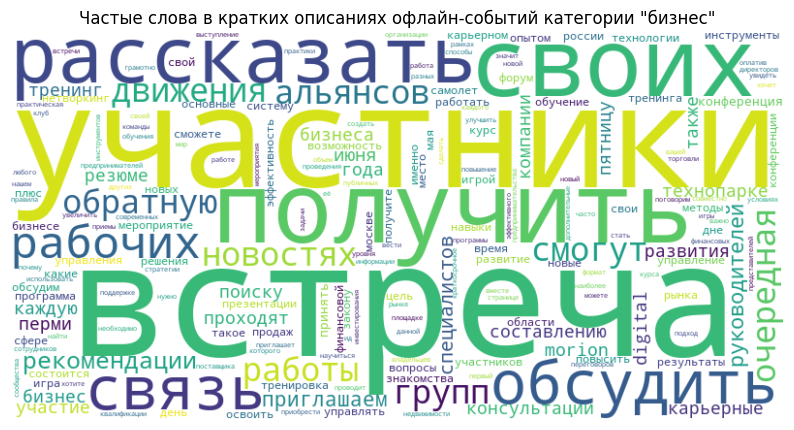

In [11]:
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Получаем описания событий из категории "бизнес", проводимых офлайн
offline_business_events = data[(data['Категория события'] == 'Бизнес') & (~data['Город'].str.contains('Онлайн', case=False))]['Краткое описание'].dropna()

# Создаем строку, содержащую все описания событий
all_descriptions_offline = ' '.join(offline_business_events)

# Определяем список стоп-слов для русского языка
stop_words = set(stopwords.words('russian'))
stop_words.update(['это', 'которые', 'пройдет'])
# Очищаем текст от лишних символов и приводим к нижнему регистру
cleaned_text_offline = ' '.join([word.lower() for word in all_descriptions_offline.split() if word.isalpha() and word.lower() not in stop_words])

# Считаем частоту встречаемости слов
word_freq_offline = Counter(cleaned_text_offline.split())

# Создаем облако слов
wordcloud_offline = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_offline)

# Отображаем облако слов
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_offline, interpolation='bilinear')
plt.title('Частые слова в кратких описаниях офлайн-событий категории "бизнес"')
plt.axis('off')
plt.show()

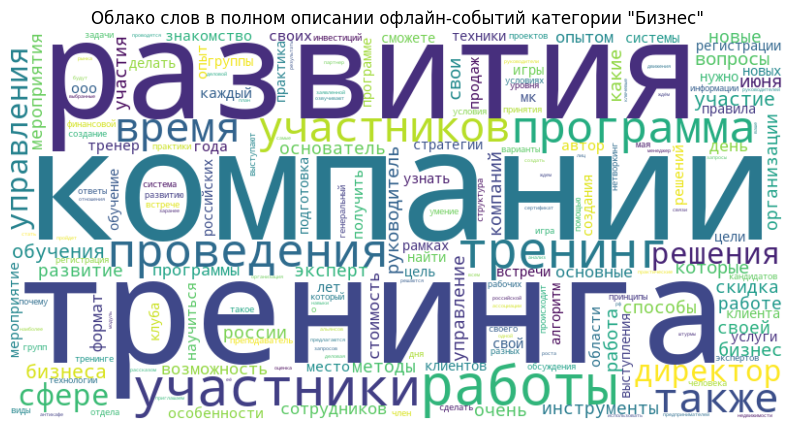

In [12]:
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Получаем названия офлайн-событий из категории "Бизнес"
offline_business_events = data[(data['Категория события'] == 'Бизнес') & (~data['Город'].str.contains('Онлайн', case=False))]['Полное описание'].dropna()

# Создаем строку, содержащую все названия офлайн-событий
all_titles_offline = ' '.join(offline_business_events)

# Определяем список стоп-слов для русского языка
stop_words = set(stopwords.words('russian'))
stop_words.add('это')

# Очищаем текст от лишних символов и приводим к нижнему регистру
cleaned_text_offline = ' '.join([word.lower() for word in all_titles_offline.split() if word.isalpha() and word.lower() not in stop_words])

# Считаем частоту встречаемости слов
word_freq_offline = Counter(cleaned_text_offline.split())

# Создаем облако слов
wordcloud_offline = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_offline)

# Отображаем облако слов
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_offline, interpolation='bilinear')
plt.title('Облако слов в полном описании офлайн-событий категории "Бизнес"')
plt.axis('off')
plt.show()

### Рассмотрим топ 5 категорий событий по стоимости билетов

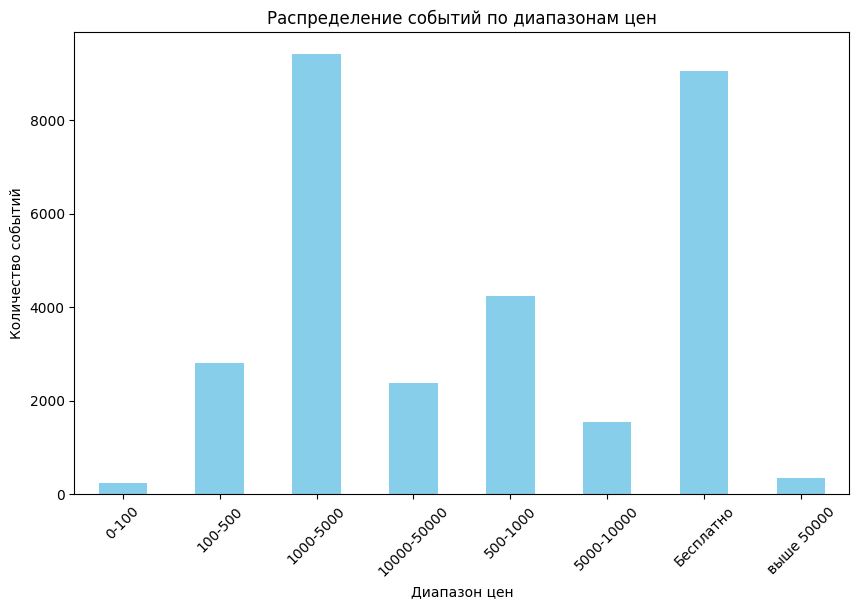

In [13]:
# Функция для определения диапазона цен
def classify_price(price):
    if price == 0:
        return 'Бесплатно'
    elif 0 < price <= 100:
        return '0-100'
    elif 100 < price <= 500:
        return '100-500'
    elif 500 < price <= 1000:
        return '500-1000'
    elif 1000 < price <= 5000:
        return '1000-5000'
    elif 5000 < price <= 10000:
        return '5000-10000'
    elif 10000 < price <= 50000:
        return '10000-50000'
    else:
        return 'выше 50000'

# Расширение данных с учетом разделенных значений стоимости билетов
expanded_data = []
for index, row in data.iterrows():
    prices = row['Стоимость билета'].split(',')
    for price in prices:
        expanded_data.append({
            'Название': row['Название'],
            'Стоимость билета': float(price),
            'Диапазон цен': classify_price(float(price))
        })

expanded_df = pd.DataFrame(expanded_data)

# Построение гистограммы распределения событий по диапазонам цен
price_ranges = expanded_df['Диапазон цен'].value_counts().sort_index()
price_ranges.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.xlabel('Диапазон цен')
plt.ylabel('Количество событий')
plt.title('Распределение событий по диапазонам цен')
plt.xticks(rotation=45)
plt.show()

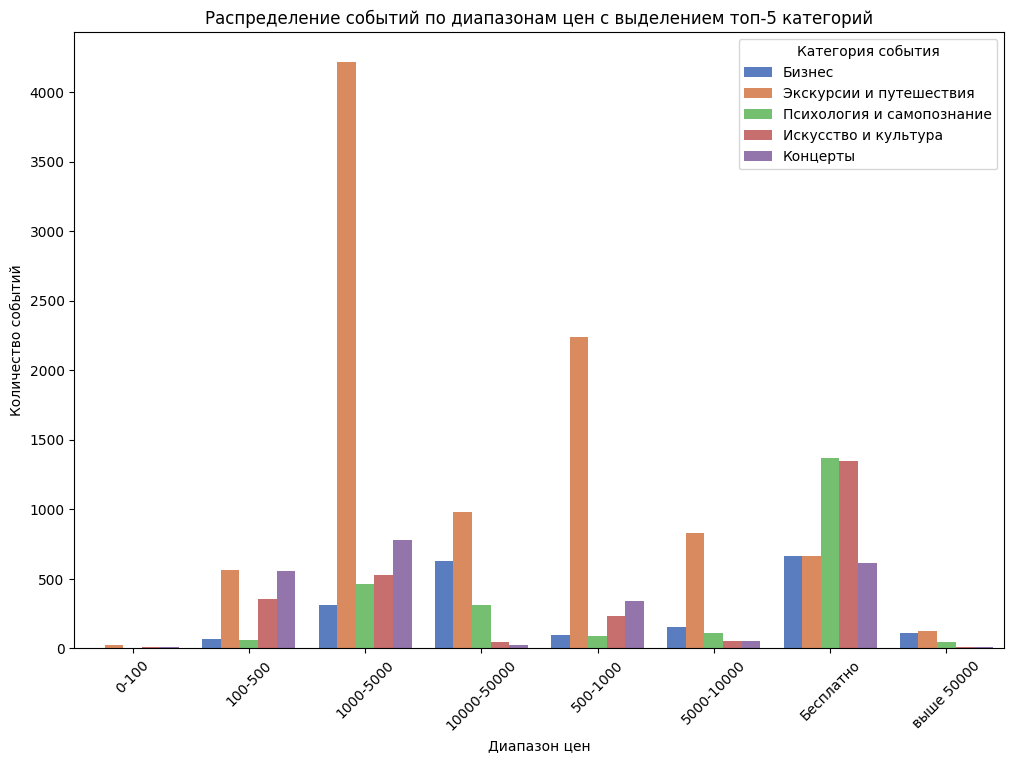

In [15]:
# Функция для определения диапазона цен
def classify_price(price):
    if price == 0:
        return 'Бесплатно'
    elif 0 < price <= 100:
        return '0-100'
    elif 100 < price <= 500:
        return '100-500'
    elif 500 < price <= 1000:
        return '500-1000'
    elif 1000 < price <= 5000:
        return '1000-5000'
    elif 5000 < price <= 10000:
        return '5000-10000'
    elif 10000 < price <= 50000:
        return '10000-50000'
    else:
        return 'выше 50000'

# Создадим категориальную переменную "Категория события (топ-5)"
top_categories = data['Категория события'].value_counts().nlargest(5).index

# Отфильтруем данные по топ-5 категориям событий
top_category_data = data[data['Категория события'].isin(top_categories)]

# Расширение данных с учетом разделенных значений стоимости билетов
expanded_data = []
for index, row in top_category_data.iterrows():
    prices = row['Стоимость билета'].split(',')
    for price in prices:
        expanded_data.append({
            'Название': row['Название'],
            'Стоимость билета': float(price),
            'Категория события': row['Категория события'],
            'Диапазон цен': classify_price(float(price))
        })

expanded_df = pd.DataFrame(expanded_data)

# Построение гистограммы распределения событий по диапазонам цен с выделением топ-5 категорий
plt.figure(figsize=(12, 8))
sns.countplot(data=expanded_df, x='Диапазон цен', hue='Категория события', order=price_ranges.index, palette='muted')
plt.xlabel('Диапазон цен')
plt.ylabel('Количество событий')
plt.title('Распределение событий по диапазонам цен с выделением топ-5 категорий')
plt.xticks(rotation=45)
plt.legend(title='Категория события')
plt.show()